# Titanic - Machine Learning from Disaster

Pequeño resumen

Cuando tenga, los resultados obtenidos

## Overview

### 1. Understand the data

As a first step, we import the data as following:

In [3]:
import pandas as pd

df = pd.read_csv('data/titanic/train.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Now it's time to understand the nature of the data.

First of all it's going to be checked the dataframe information:

In [4]:
print("Information:")
print(df.info())

print("Describe:")
print(df.describe())

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Describe:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std   

a (texto aquí help)

In [5]:
df = pd.read_csv('data/train-clean.csv')
df.drop(df[df['Descartado'] == 1].index, inplace=True)
df.drop('Descartado', axis=1, inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
'''
Datos numéricos:
    PassengerId
    Survived (es el expected output)
    Pclass
    Age
    SibSp
    Parch
    Fare
Datos categóricos:
    Sex
    Embarked
Datos excluidos:
    Name (no trabajaré con eso por ahora, quizá luego sí)
    Ticket
    Cabin
'''

numerical_data = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
categorical_data = df[['Sex', 'Embarked']]

print(numerical_data)
print(categorical_data)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
885          886         0       3  39.0      0      5  29.1250
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[714 rows x 7 columns]
        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
885  female        Q
886    male        S
887  female        

PassengerId    0.029340
Survived       1.000000
Pclass        -0.359653
Age           -0.077221
SibSp         -0.017358
Parch          0.093317
Fare           0.268189
dtype: float64


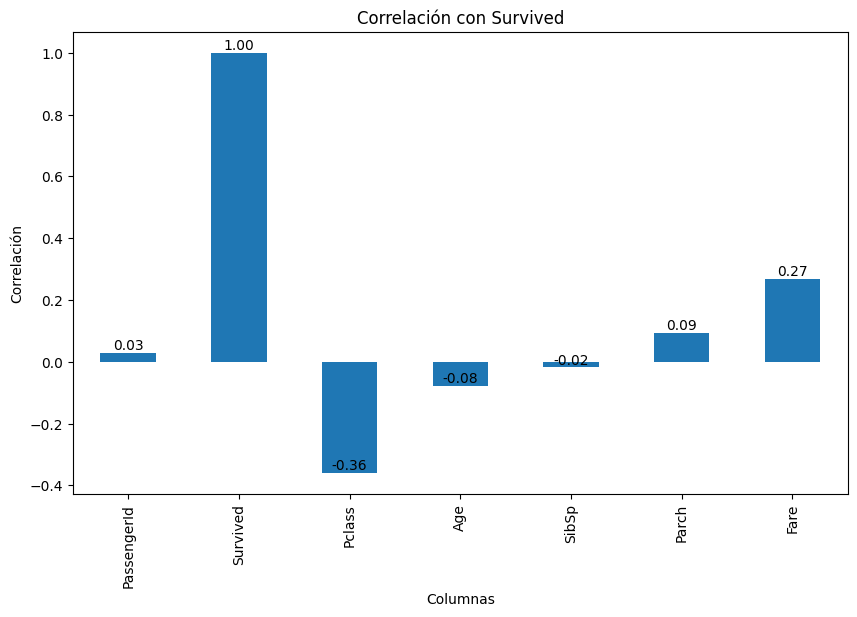

In [7]:
correlation_with_survived = numerical_data.corrwith(numerical_data['Survived'])
print(correlation_with_survived)

import matplotlib.pyplot as plt

correlation_with_survived.plot(kind='bar', figsize=(10, 6))
plt.title('Correlación con Survived')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
for i, corr in enumerate(correlation_with_survived):
    plt.text(i, corr, f'{corr:.2f}', ha='center', va='bottom')
plt.show()

- Male   y    survived = 109
- Male   y no survived = 468
- Female y    survived = 233
- Female y no survived =  81

El 18.89% de los hombres (577) sobrevivieron (109). El 81.109% de los hombres (577) no sobrevivieron (468).

El 74.293% de las mujeres (314) sobrevivieron (233). El 25.79% de las mujeres (314) no sobrevivieron (81).

De los sobrevivientes (342), el 31.87% fueron hombres (109). El 68.13% fueron mujeres (233).

De los que no sobrevivieron (549) el 85.24% fueron hombres (468). El 14.75% fueron mujeres (81).

---

-    Survived y C =  93
- No survived y C =  75
-    Survived y Q =  30
- No survived y Q =  47
-    Survived y S = 217
- No survived y S = 427

De los C (168), el 55.35% sobrevivieron (93). El 44.64% no sobrevivieron (75).

De los Q (168), el 38.96% sobrevivieron (30). El 61.03% no sobrevivieron (47).

De los S (168), el 33.69% sobrevivieron (217). El 66.30% no sobrevivieron (427).

De los sobrevivientes (340), el 27.35% son de los C (93). El 8.82% son de los Q (30). El 63.82% son de los S (217).

De los no sobrevivientes (549), el 13.66% son de los C (75). El 8.56% son de los Q (47). El 77.77% son de los S (427).

Se me ocurre hacer más análisis como la distribución de datos de algún campo que chance y hago luego

In [23]:
backup_df = df.copy()
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
df['Embarked'] = df['Sex'].replace({'C': 0, 'Q': 1, 'S': 2})

from sklearn import svm
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Excluye la columna objetivo
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un clasificador SVM
clf = svm.SVC(kernel='linear')  # Puedes ajustar el kernel según tus necesidades

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Puedes imprimir un informe de clasificación para obtener métricas adicionales
report = classification_report(y_test, y_pred)
print('Informe de clasificación:')
print(report)

Precisión del modelo: 0.73
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143

